# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import cv2
import os
import sklearn
import tensorflow as tf
import sys
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from matplotlib import __version__ as plt__version
from math import ceil, pow

A4_PORTRAIT = (8.27, 11.69)
A4_LANDSCAPE = A4_PORTRAIT[::-1]

In [2]:
# Load pickled data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [3]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
print(X_train.shape)
print(y_train.shape)
print('---')
print(X_valid.shape)
print(y_valid.shape)
print('---')
print(X_test.shape)
print(y_test.shape)


(34799, 32, 32, 3)
(34799,)
---
(4410, 32, 32, 3)
(4410,)
---
(12630, 32, 32, 3)
(12630,)


In [5]:
signnames = pd.read_csv('signnames.csv')['SignName']
signnames

0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                             N

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = signnames.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
y_train[:100]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41], dtype=uint8)

Speed limit (20km/h)


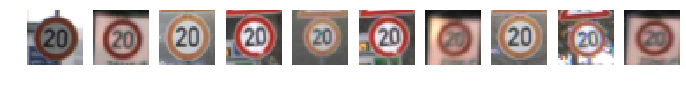

Speed limit (30km/h)


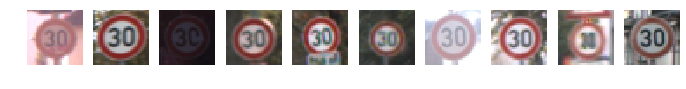

Speed limit (50km/h)


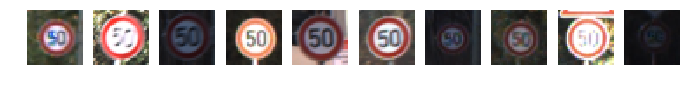

Speed limit (60km/h)


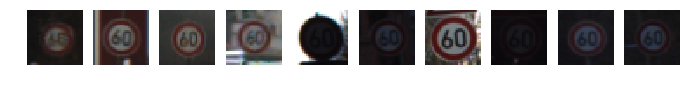

Speed limit (70km/h)


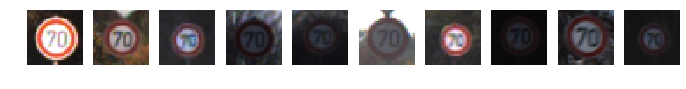

Speed limit (80km/h)


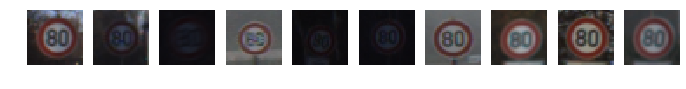

End of speed limit (80km/h)


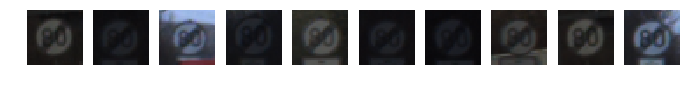

Speed limit (100km/h)


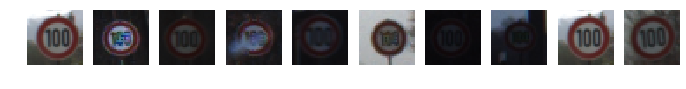

Speed limit (120km/h)


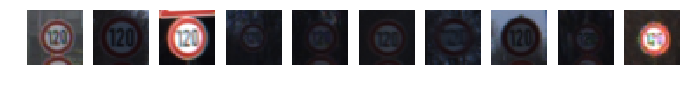

No passing


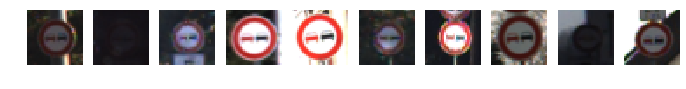

No passing for vehicles over 3.5 metric tons


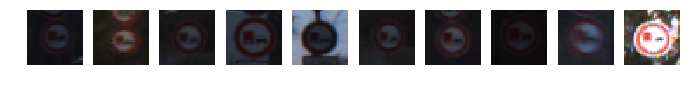

Right-of-way at the next intersection


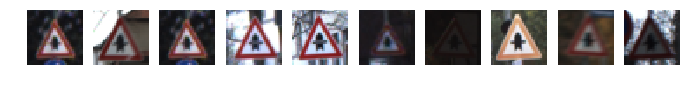

Priority road


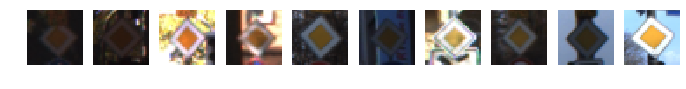

Yield


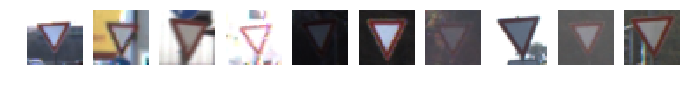

Stop


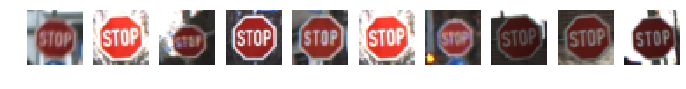

No vehicles


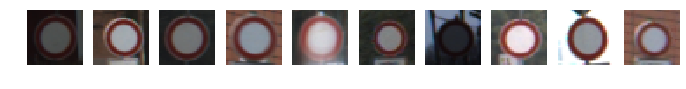

Vehicles over 3.5 metric tons prohibited


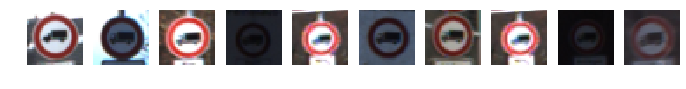

No entry


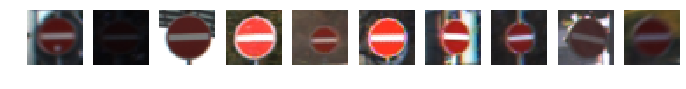

General caution


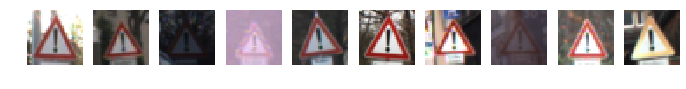

Dangerous curve to the left


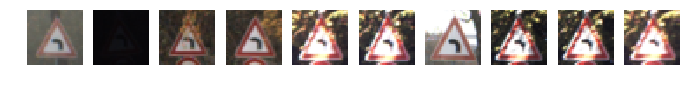

Dangerous curve to the right


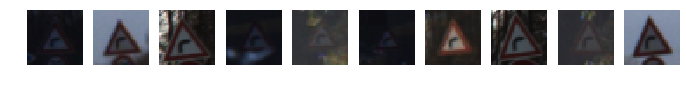

Double curve


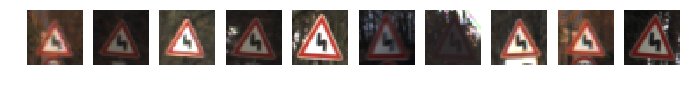

Bumpy road


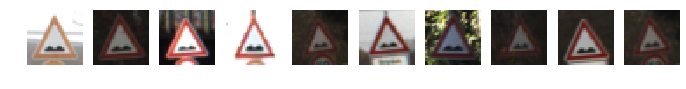

Slippery road


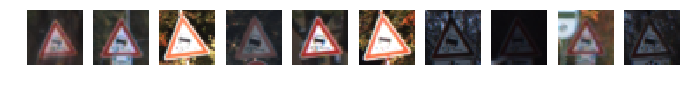

Road narrows on the right


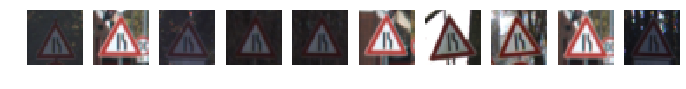

Road work


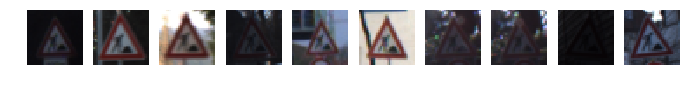

Traffic signals


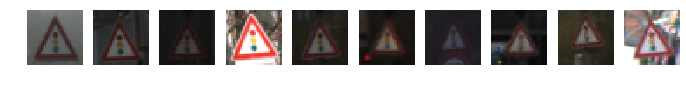

Pedestrians


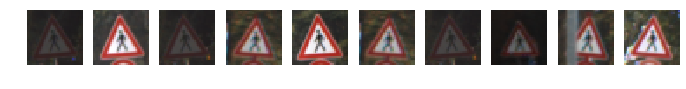

Children crossing


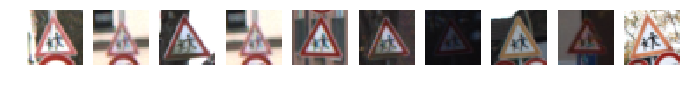

Bicycles crossing


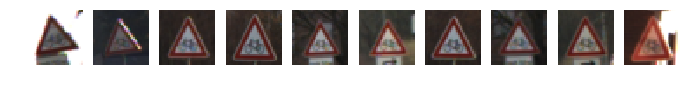

Beware of ice/snow


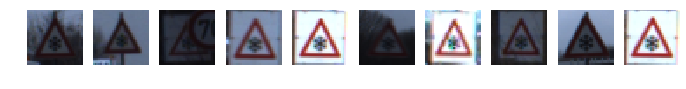

Wild animals crossing


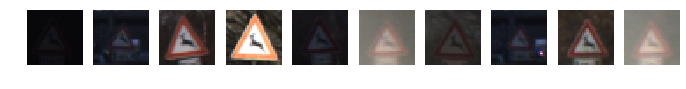

End of all speed and passing limits


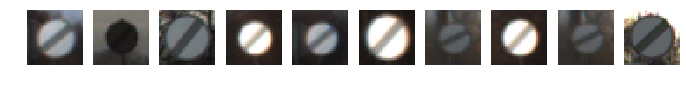

Turn right ahead


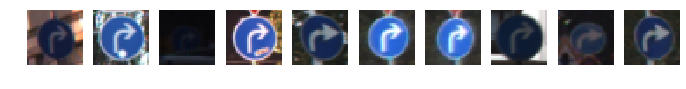

Turn left ahead


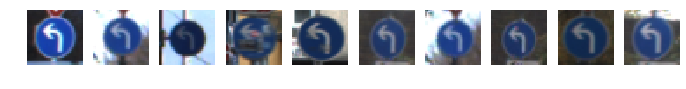

Ahead only


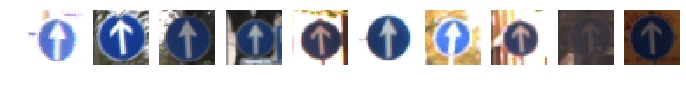

Go straight or right


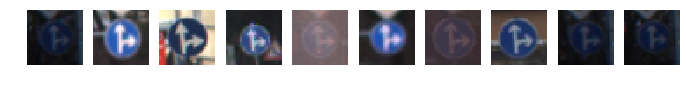

Go straight or left


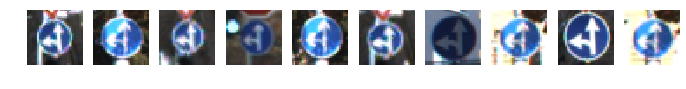

Keep right


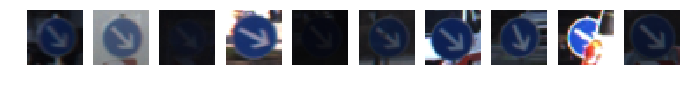

Keep left


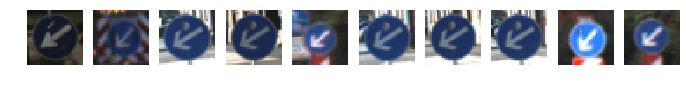

Roundabout mandatory


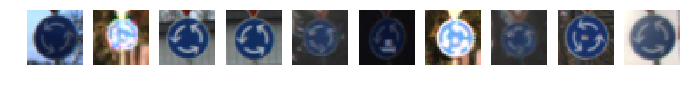

End of no passing


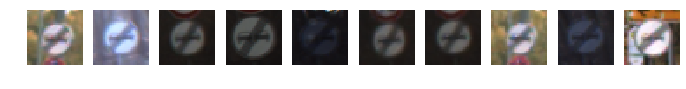

End of no passing by vehicles over 3.5 metric tons


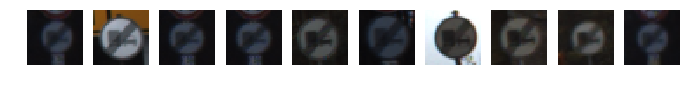

In [8]:
### Data exploration visualization code goes here.
# Examples to display
n = 10

for c in range(n_classes):
    idx = np.where(y_train == c)
    n_images = X_train[np.random.choice(idx[0], n)]
    f, axes = plt.subplots(1, n)
    f.set_size_inches(A4_LANDSCAPE)
    print(signnames[c])
    for i, image in enumerate(n_images):
        axes[i].imshow(image)
        axes[i].grid(False)
        axes[i].axis('off')
    plt.show()

The first 18 pictures - all of them as "41: End of no passing". Images looks nicely trimmed around the sign.

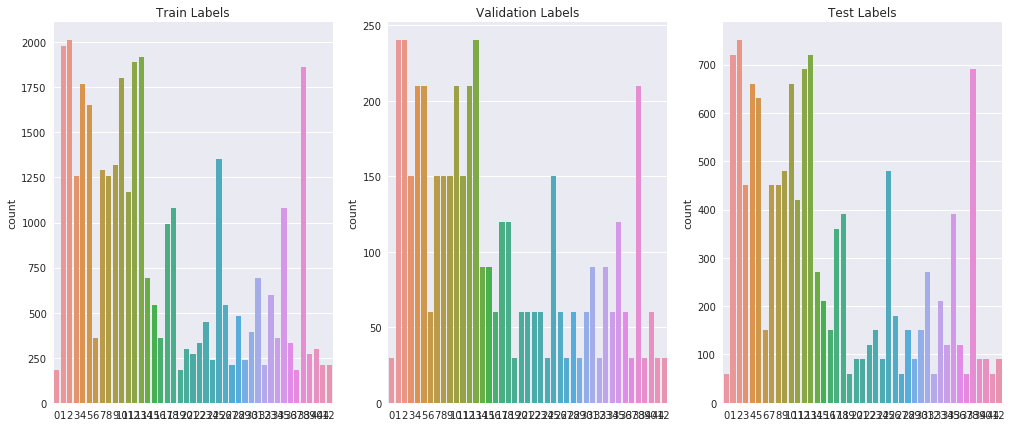

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
sns.countplot(y_train, ax=ax1)
ax1.set_title("Train Labels")
sns.countplot(y_valid, ax=ax2)
ax2.set_title("Validation Labels")
sns.countplot(y_test, ax=ax3)
ax3.set_title("Test Labels")
plt.show()

The distribution of labels looks more or less similar between train set, validation set and test set. Looks good - take a closer look at train set labels.

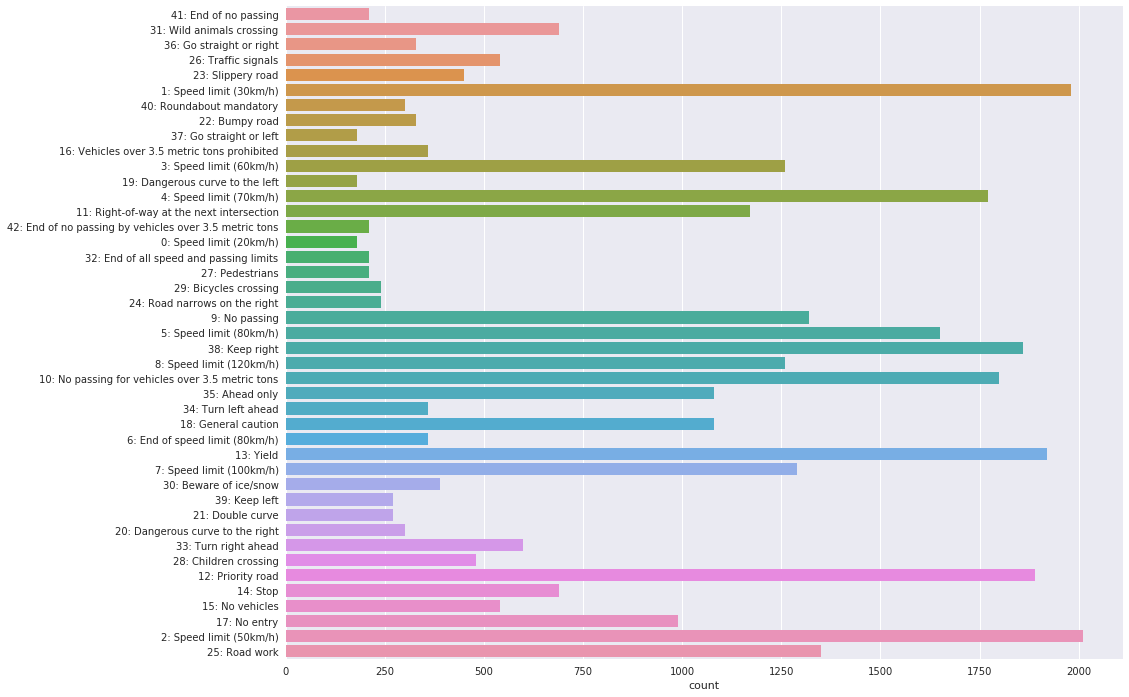

In [10]:
labels = ["{}: {}".format(label, signnames[label]) for label in y_train]
plt.figure(figsize=(15,12))
sns.countplot(y=labels)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

In [12]:
# Define function to normalize the image in grayscale to apply the same for train, validation and test set
def grayscale(image):
    return cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))[0]

def equalize(image):
    return cv2.equalizeHist(image)

def normalize_im(image):
    mini, maxi = np.min(image), np.max(image)
    return (image - mini) / (maxi - mini) * 2 - 1

def preprocess_im(image):
    return np.expand_dims(normalize_im(equalize(grayscale(image))), axis=2)

def preprocess(dataset):
    return np.array([preprocess_im(im) for im in dataset])

In [13]:
X_train_n = preprocess(X_train)
X_valid_n = preprocess(X_valid)
X_test_n = preprocess(X_test)

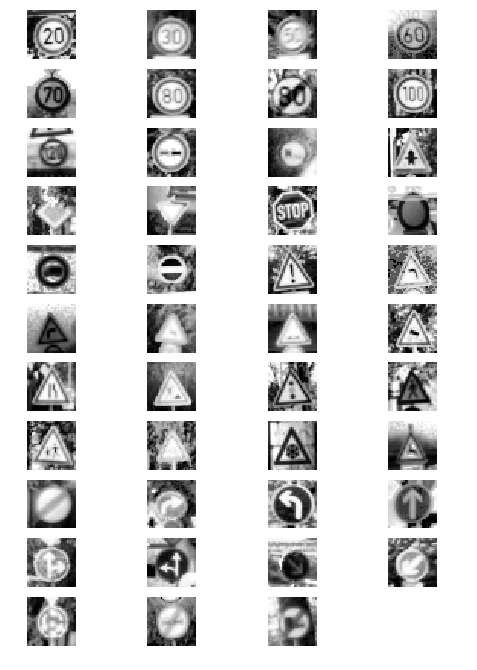

In [14]:
# Visualize some of the pre-processed data, one for each class
f, axes = plt.subplots(11, 4)
f.set_size_inches(A4_PORTRAIT)
c = 0
for row in axes:
    for ax in row:
        if c < n_classes:
            im = (X_train_n[np.random.choice(np.where(y_train == c)[0], 1)] + 1) / 2
            ax.imshow(im[0,:,:,0], cmap='gray')
        ax.grid(False)
        ax.axis('off')
        c += 1
plt.show()

In [15]:
# Rebalance and data augmentation

def rotate(image, angle=15):
    angle = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))

def translate(image, pixels=2):
    tx = np.random.choice(range(-pixels, pixels))
    ty = np.random.choice(range(-pixels, pixels))
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))

def random_bright(image):
    eff = 0.5 + np.random.random()
    return image * eff

def generate(images, count):
    generated = []
    while True:
        for image in images:
            if len(generated) == count:
                return generated
            image = random_bright(image)
            image = rotate(image)
            image = translate(image)
            image = normalize_im(image)
            generated.append(np.expand_dims(image, axis=2))

unique, counts = np.unique(y_train, return_counts=True)

target = 5000
X_augmented = []
y_augmented = []

for cls, count in tqdm(list(zip(unique, counts)), 'Augmenting train set for each class'):
    diff = target - count
    X_augmented += generate(X_train_n[np.where(y_train == cls)[0]], diff)
    y_augmented += [cls for _ in range(diff)]

X_train_n = np.concatenate([X_train_n, np.array(X_augmented)])
y_train = np.concatenate([y_train, np.array(y_augmented)])
n_train_n = y_train.size

print('The number of train data before the augumentation: ', n_train)
print('The number of train data after the augumentation: ', n_train_n)


Augmenting train set for each class: 100%|██████████| 43/43 [00:27<00:00,  1.45it/s]


The number of train data before the augumentation:  34799
The number of train data after the augumentation:  215000


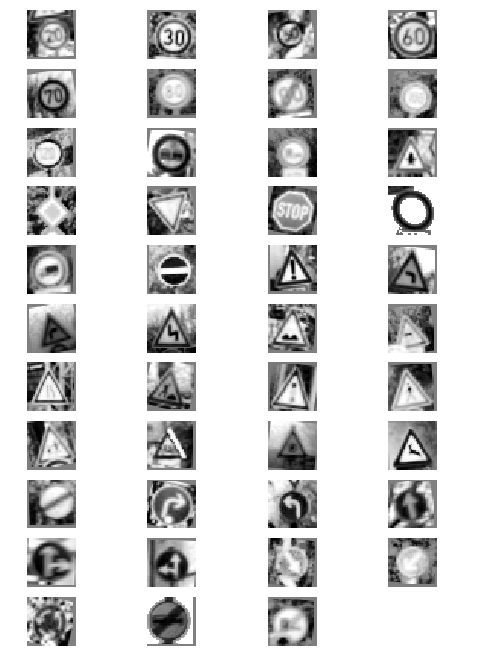

In [16]:
# Visualize the same after augmentation
f, axes = plt.subplots(11, 4)
f.set_size_inches(A4_PORTRAIT)
c = 0
for row in axes:
    for ax in row:
        if c < n_classes:
            im = (X_train_n[np.random.choice(np.where(y_train == c)[0], 1)] + 1) / 2
            ax.imshow(im[0,:,:,0], cmap='gray')
        ax.grid(False)
        ax.axis('off')
        c += 1
plt.show()

### Model Architecture
#### LeNet architecture

![LeNet Architecture](./images/lenet.png)
Source: Yan LeCun

In [17]:
### Define your architecture here.
def conv2d(x, kernel, input_depth, output_depth, stride=1, padding='VALID', mu=0, sigma=0.1):
    shape = (kernel, kernel, input_depth, output_depth)
    W = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_depth))
    conv = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding)
    conv = tf.nn.bias_add(conv, b)
    return conv


def fully(x, input_size, output_size, mu=0, sigma=0.1):
    W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_size))
    fc = tf.matmul(x, W)
    fc = tf.add(fc, b)
    return fc


def max_pool(x, size, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, size, size, 1], strides=[1, size, size, 1], padding=padding)


def traffic_sign_model(x, keep_prob, mu=0, sigma=0.1):
    # 3x3 convolution with ReLU activation
    conv1 = conv2d(x, 3, 1, 12)
    conv1 = tf.nn.relu(conv1)

    # 3x3 convolution with ReLU activation
    conv1 = conv2d(conv1, 3, 12, 24)
    conv1 = tf.nn.relu(conv1)
    pool1 = max_pool(conv1, 2)

    # 5x5 convolution with ReLU activation
    conv2 = conv2d(pool1, 5, 24, 36)
    conv2 = tf.nn.relu(conv2)

    # 5x5 convolution with ReLU activation
    conv2 = conv2d(conv2, 5, 36, 48)
    conv2 = tf.nn.relu(conv2)
    pool2 = max_pool(conv2, 2)

    # Flatten and Concatenate
    flat1 = tf.contrib.layers.flatten(pool1)
    flat2 = tf.contrib.layers.flatten(pool2)
    flattened = tf.concat([flat1, flat2], axis=1)

    # First fully connected with 512 neurons and dropout to reduce variance
    fully1 = fully(flattened, 5136, 512)
    fully1 = tf.nn.relu(fully1)
    fully1 = tf.nn.dropout(fully1, keep_prob)

    # Second fully connected with 256 neurons and dropout to reduce variance
    fully2 = fully(fully1, 512, 256)
    fully2 = tf.nn.relu(fully2)
    fully2 = tf.nn.dropout(fully2, keep_prob)

    # Output layer
    return fully(fully2, 256, n_classes), conv1, conv2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

batch_size = 32
keep_prob = .5
epochs = 100
patience = 3
modelname = 'traffic_sign_model'


def generator(x_data, y_data, batch_size, shuffle=False, desc=None):
    if shuffle:
        x_data, y_data = sklearn.utils.shuffle(x_data, y_data)
    gen = range(0, len(x_data), batch_size)
    gen = tqdm(gen, desc) if desc is not None else gen
    for offset in gen:
        end = offset + batch_size
        yield x_data[offset:end], y_data[offset:end]


tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
kp = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

def evaluate(x_data, y_data, desc=None):
    total_accuracy = 0
    sess = tf.get_default_session()
    if desc is None:
        gen = generator(x_data, y_data, batch_size=batch_size)
    else:
        gen = generator(x_data, y_data, batch_size=batch_size, desc=desc)
    for x_batch, y_batch in gen:
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_batch, y: y_batch, kp: 1.0})
        total_accuracy += (accuracy * len(x_batch))
    return total_accuracy / len(x_data)

# Exponential decaying learning rate
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(
    learning_rate=0.0005,
    global_step=global_step,
    decay_steps=ceil(n_train / batch_size),  # Decay every epoch
    decay_rate=0.95,
    staircase=True)

logits, conv1, conv2 = traffic_sign_model(x, kp)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [19]:
best_epoch = 0
best_val_acc = 0
history = []
with tf.Session() as sess:
    if os.path.exists('checkpoint'):
        print('Restore {}.cktp to continue training'.format(modelname))
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    else:
        print("Training {}...".format(modelname))
        sess.run(tf.global_variables_initializer())

    try:
        for i in range(epochs):
            desc = "EPOCH {} ...".format(i + 1)
            sys.stdout.flush()
            for x_batch, y_batch in generator(X_train_n, y_train, batch_size=batch_size, shuffle=True, desc=desc):
                sess.run(training_operation, feed_dict={x: x_batch, y: y_batch, kp: keep_prob})

            train_acc = evaluate(X_train_n, y_train, desc='Evaluating training')
            val_acc = evaluate(X_valid_n, y_valid, desc='Evaluating validation')
            print("Training Accuracy = {:.3f}".format(train_acc))
            print("Validation Accuracy = {:.3f}".format(val_acc))

            history.append([train_acc, val_acc])
            if val_acc > best_val_acc:
                best_epoch, best_val_acc = i, val_acc
                saver.save(sess, './{}.ckpt'.format(modelname))
                print("Model saved")
            else:
                if i - best_epoch == patience:
                    print('Stopping after {} epochs without improvement'.format(patience))
                    break
    except KeyboardInterrupt:
        pass

Restore traffic_sign_model.cktp to continue training
INFO:tensorflow:Restoring parameters from ./traffic_sign_model.ckpt


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 296.64it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.994
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 282.52it/s]


Training Accuracy = 1.000
Validation Accuracy = 0.997
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 306.41it/s]

Training Accuracy = 0.999
Validation Accuracy = 0.991



Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 305.85it/s]

Training Accuracy = 0.999
Validation Accuracy = 0.993



Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 309.87it/s]

Training Accuracy = 1.000
Validation Accuracy = 0.994
Stopping after 3 epochs without improvement


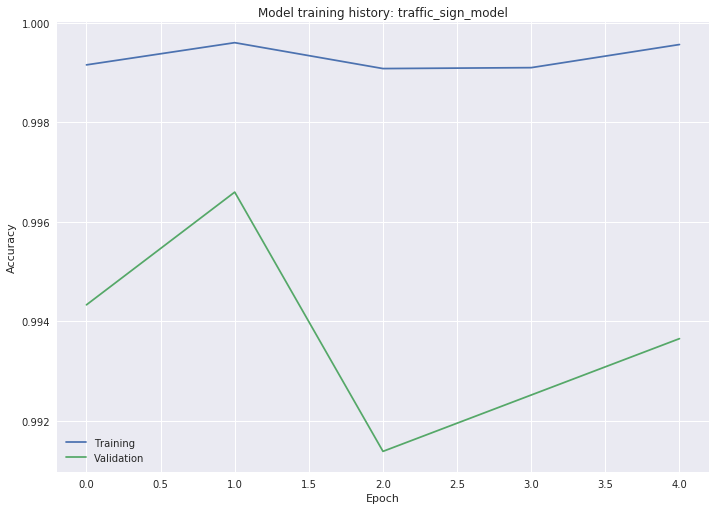

In [20]:
# Plotting the accuracy by epochs
plt.figure(figsize=A4_LANDSCAPE)
plt.title('Model training history: ' + modelname)
plt.plot(history)
plt.legend(['Training', 'Validation'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### FYI: Top 5 Softmax Probabilities for Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Predict and Analyze the Performance

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Test accuracy: {:.3f}%'.format(evaluate(X_test_n, y_test) * 100))

    softmax = tf.nn.softmax(logits)
    t_pred = None
    for x_batch, y_batch in generator(X_test_n, y_test, batch_size):
        top_softmax = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x: x_batch, y: y_batch, kp: 1.0})
        if t_pred is None:
            t_pred = top_softmax[1]
        else:
            t_pred = np.concatenate([t_pred, top_softmax[1]])
    correct = np.sum([1 for t_pred, actual in zip(t_pred, y_test) if actual in t_pred])
    print('Top 5 test accuracy: {:.3f}%'.format(100 * correct / len(y_test)))

INFO:tensorflow:Restoring parameters from ./traffic_sign_model.ckpt
Test accuracy: 97.712%
Top 5 test accuracy: 99.517%


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="./images/visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./traffic_sign_model.ckpt


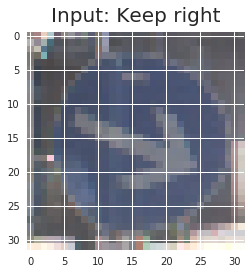

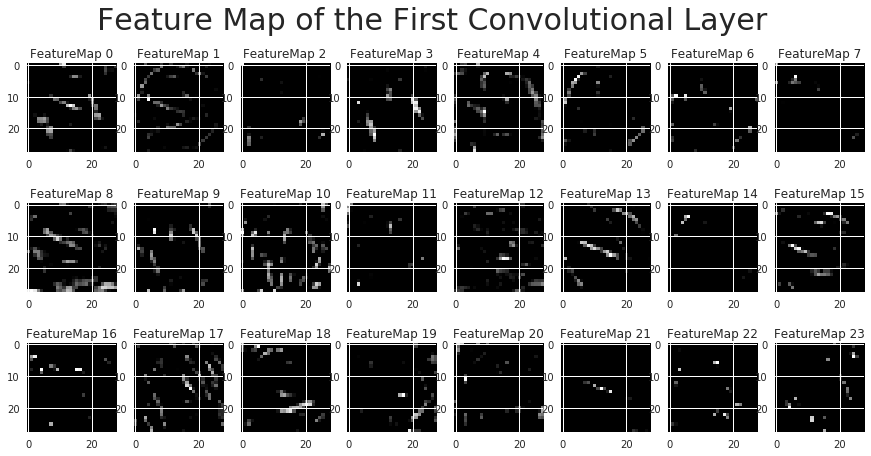

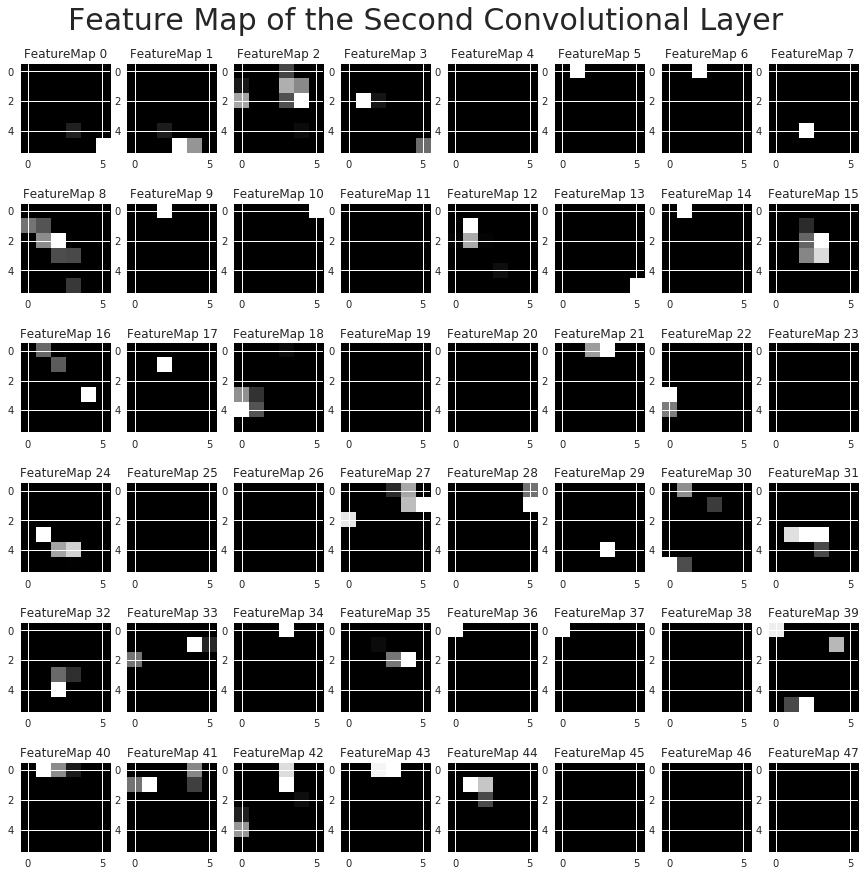

In [22]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1, plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ix = int(np.random.random() * X_test_n.shape[0])
    random_image = np.expand_dims(X_test_n[ix], axis=0)
    
    plt.imshow(X_test[ix])
    plt.title("Input: " + signnames[y_test[ix]], fontsize=20, y=1.02)
    plt.show()

    outputFeatureMap(random_image, conv1, plt_num=1)
    plt.suptitle("Feature Map of the First Convolutional Layer", fontsize=30, y=0.92)
    plt.show()
    
    outputFeatureMap(random_image, conv2, plt_num=2)
    plt.suptitle("Feature Map of the Second Convolutional Layer", fontsize=30, y=0.92)
    plt.show()
            